In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
t = np.arange(0,1500)

In [66]:
len(t)

1500

In [67]:
type(t)

numpy.ndarray

In [73]:
y = np.sin(t * 0.02)

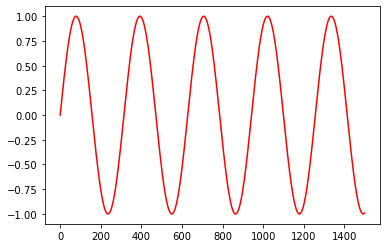

In [74]:
plt.plot(y,"r")

In [36]:
np.linspace(0,100,num=10)

array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
        44.44444444,  55.55555556,  66.66666667,  77.77777778,
        88.88888889, 100.        ])

In [37]:
np.pi

3.141592653589793

In [38]:
inp = np.linspace(-np.pi , np.pi)

In [41]:
inp

array([-3.14159265, -3.01336438, -2.88513611, -2.75690784, -2.62867957,
       -2.5004513 , -2.37222302, -2.24399475, -2.11576648, -1.98753821,
       -1.85930994, -1.73108167, -1.60285339, -1.47462512, -1.34639685,
       -1.21816858, -1.08994031, -0.96171204, -0.83348377, -0.70525549,
       -0.57702722, -0.44879895, -0.32057068, -0.19234241, -0.06411414,
        0.06411414,  0.19234241,  0.32057068,  0.44879895,  0.57702722,
        0.70525549,  0.83348377,  0.96171204,  1.08994031,  1.21816858,
        1.34639685,  1.47462512,  1.60285339,  1.73108167,  1.85930994,
        1.98753821,  2.11576648,  2.24399475,  2.37222302,  2.5004513 ,
        2.62867957,  2.75690784,  2.88513611,  3.01336438,  3.14159265])

In [43]:
opt= np.sin(inp)

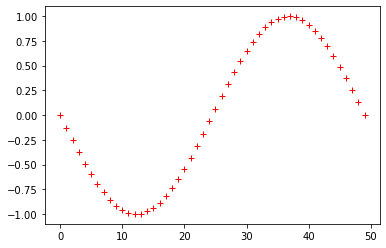

In [47]:
plt.plot(opt,"r+")

In [84]:
y_with_noise = np.sin(t * 0.02) + np.random.uniform(low=-1.0,high=1.0,size=(1500,))

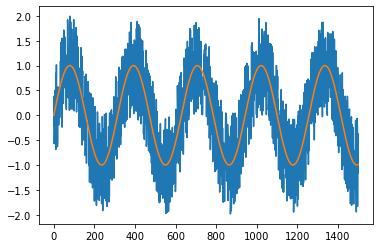

In [85]:
plt.plot(y_with_noise)
plt.plot(y)

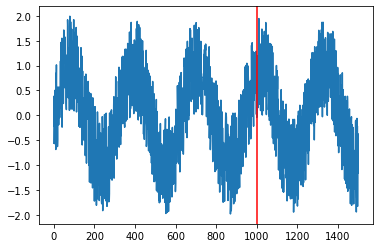

In [91]:
plt.plot(y_with_noise)
plt.axvline(1000, color="r")

In [92]:
train = y_with_noise[0:1000]

In [93]:
train.shape

(1000,)

In [94]:
test = y_with_noise[1000:]

In [95]:
test.shape

(500,)

In [96]:
def createdataset(data,step):
    x=[]
    y=[]
    for i in range(len(data)-step):
        x.append(data[i:i+step])
        y.append(data[i+step])
    return np.array(x),np.array(y)

In [98]:
trainX , trainY = createdataset(train,10)

In [99]:
trainX.shape

(990, 10)

In [100]:
trainY.shape

(990,)

In [101]:
testX,testY = createdataset(test,10)

In [102]:
testX.shape

(490, 10)

In [104]:
testY.shape

(490,)

In [107]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN

In [108]:
model = Sequential()

In [109]:
model.add(
    SimpleRNN(
        units = 1,
        activation="tanh"
))

In [111]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'SimpleRNN',
   'config': {'name': 'simple_rnn',
    'trainable': True,
    'dtype': 'float32',
    'return_sequences': False,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 1,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'recurrent_constraint': None,
    'bias_constraint': None,
    'dropout': 0.0,
    'recurrent_dropout': 0.0}}]}

In [114]:
model.add(
    Dense(
        units = 1,
        activation = "linear"
))

In [116]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'SimpleRNN',
   'config': {'name': 'simple_rnn',
    'trainable': True,
    'dtype': 'float32',
    'return_sequences': False,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 1,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'recurrent_constraint': None,
    'bias_constraint': None,
    'dropout': 0.0,
    'recurrent_dropout': 0.0}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32

In [117]:
model.compile(loss="mean_squared_error",optimizer='rmsprop')

In [131]:
model.fit(trainX,trainY,epochs=50)

Epoch 1/50


ValueError: in user code:

    /root/anaconda3/envs/deeplearning_env/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /root/anaconda3/envs/deeplearning_env/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /root/anaconda3/envs/deeplearning_env/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /root/anaconda3/envs/deeplearning_env/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /root/anaconda3/envs/deeplearning_env/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /root/anaconda3/envs/deeplearning_env/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /root/anaconda3/envs/deeplearning_env/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /root/anaconda3/envs/deeplearning_env/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /root/anaconda3/envs/deeplearning_env/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:223 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 10)


In [127]:
trainX.shape

(990, 10)

In [128]:
trainY.shape

(990, 1)

In [129]:
trainY = trainY.reshape((-1,1))

In [130]:
trainY.shape

(990, 1)

In [132]:
from sklearn.preprocessing import MinMaxScaler

In [135]:
normalizer = MinMaxScaler(feature_range=(0,1))

In [136]:
y_with_noise = y_with_noise.reshape((-1,1))

In [137]:
y_with_noise.shape

(1500, 1)

In [138]:
y_with_noise_final = normalizer.fit_transform(y_with_noise)

In [139]:
y_with_noise_final

array([[0.35747319],
       [0.49567786],
       [0.59635084],
       ...,
       [0.3683695 ],
       [0.20523511],
       [0.40413314]])

In [141]:
train=y_with_noise_final[0:1000]

In [142]:
test=y_with_noise_final[1000:]

In [144]:
train.shape

(1000, 1)